Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Indice de Contenidos

### Introducción.
### Inicialización y Carga de Datos. 
### Análisis Exploratorio de Datos.
#### Información General de los Conjuntos de Datos.
#### Corrección de Tipos de Datos.
#### Unión de los Conjuntos de Datos.
#### Exploración de Valores Faltantes.
#### Visualización de Variables.
### Análisis del Equilibrio de Clases.
### División del Conjunto de Datos.
### Aplicación One-Hot Encoding.
### Selección y Entrenamiento del Modelos.
### Búsqueda Hiperparámetros con GridSearchCV.
### Método del Sobremuestreo. 
### Conclusiones.


## Introducción.

Este proyecto vamos a trabajar con datos pertenecientes a la operador de telecomunicaciones Interconnect. A esta empresa le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales.

Por lo anterior, nuestro objetivo es de poder construir un modelo que nos permita predecir si un cliente cancelará el contrato que tienen con la empresa Interconnect. Para ello disponemos de los datos que el equipo de marketing de Interconnect ha recopilado, los cuales corresponden a datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>
<div class="alert alert-block alert-info">
<b>Hola Hesus, muchas gracias por tu revisión y comentarios. Fue incorporada una tabla de contenidos al principio.</b> <a class=“tocSkip”></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Excelente introducción. Has establecido claramente el contexto del problema y el objetivo del proyecto. La descripción de los datos disponibles es precisa y concisa.
</div>

## Inicialización y Carga de Datos. 

Primero procedemos a importar las distintas Librerías:

In [1]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos
sns.set_theme() # ocupamos esa librería para tener meejores gráficos
from sklearn.model_selection import train_test_split #importamos la función train_test_split biblioteca scikit-learn
from sklearn.ensemble import RandomForestClassifier # importamos la clase RandomForestClassifier 
import lightgbm as lgb #Importamos LightGBM
from sklearn.metrics import accuracy_score # importamos la función accuracy_score de la biblioteca scikit-learn
from sklearn.metrics import roc_auc_score # importamos la función roc_auc_score de la biblioteca scikit-learn
from sklearn.linear_model import LogisticRegression # importamos LogisticRegression
from sklearn.model_selection import GridSearchCV # importamos GridSearchCV
from sklearn.utils import shuffle # importamos la función shuffle de la biblioteca scikit-learn


Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente.

In [2]:
# Cargamos los 4 Conjuntos de Datos:
contract = pd.read_csv('/datasets/final_provider/contract.csv') #cargamos el DataFrame contract.
personal = pd.read_csv('/datasets/final_provider/personal.csv') #cargamos el DataFrame personal.
internet = pd.read_csv('/datasets/final_provider/internet.csv') #cargamos el DataFrame internet.
phone = pd.read_csv('/datasets/final_provider/phone.csv') #cargamos el DataFrame phone.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Buen trabajo en la importación de librerías necesarias y la carga de datos. Has mostrado una comprensión clara de las herramientas que utilizarás en el proyecto.
</div>

## Análisis Exploratorio de Datos.

### Información General de los Conjuntos de Datos.

In [3]:
# Imprimimos la información general/resumida sobre el DataFrame contract.
contract.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(contract.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
----------
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  20

Del conjunto de datos contract podemos ver que tiene 7.043 filas y 8 columnas.
Con respecto al Tipo de datos: Mayoría object con excepción de MonthlyCharges que es float64.

La columna TotalCharges debería ser numérica, pero aparece como object. Esto puede deberse a que hay valores que no se pueden convertir directamente a float.

La columna EndDate tiene valores como "No", que representa a los clientes actuales. También contiene fechas, lo que sugiere que algunos clientes ya cancelaron el servicio.

In [4]:
# Imprimimos la información general/resumida sobre el DataFrame personal.
personal.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(personal.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
----------
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


Del conjunto de datos personal podemos ver que también tiene 7.043 filas y 5 columnas.

Con respecto al Tipo de datos: object para la mayoría, excepto SeniorCitizen que es int64.
Este archivo tiene información sobre el perfil demográfico de los clientes.

In [5]:
# Imprimimos la información general/resumida sobre el DataFrame internet.
internet.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(internet.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
----------
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No            

Del conjunto de datos internet podemos ver que tiene sólo 5517 (menos que en contract.csv, lo que sugiere que no todos los clientes tienen servicios de Internet).

Con respecto al Tipo de datos: Todos object.

Este archivo contiene detalles sobre los servicios de Internet. La diferencia en el número de filas indica que no todos los clientes usan estos servicios.

In [6]:
# Imprimimos la información general/resumida sobre el DataFrame phone
phone.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(phone.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
----------
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


Del conjunto de datos phone podemos ver que tiene sólo 6361 filas (nuevamente menos que en contract.csv, indicando que no todos los clientes tienen servicios de teléfono).

Con respecto al Tipo de datos: Ambos object.

Este archivo tiene detalles sobre los servicios de teléfono. El hecho de que tenga menos filas también sugiere que no todos los clientes tienen este servicio.

### Corrección de Tipos de Datos.

En el conjunto de datos contract, realizaremos la corrección de los tipos de datos de algunas variables. Comenzaremos con la conversión de la columna TotalCharges a un formato numérico y la conversión de las columnas BeginDate y EndDate a formato de fecha (datetime).

In [7]:
# Primero convertimos 'TotalCharges' a numérico (float), forzando errores a NaN
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

Debemos recordar que la característica objetivo se encuentra en la columna 'EndDate' es igual a 'No'.

Al convertir la columna EndDate a formato de fecha, los valores "No" se convertirán en NaN, lo que podría causar complicaciones en los análisis, dado que "No" en la columna EndDate indica que el cliente aún no ha cancelado el servicio.

Para resolver esta situación vamos a crear una nueva columna binaria que indique si el cliente ha cancelado o no el servicio, esta columna la llamaremos 'IsActive'. Esta columna tendrá el valor 1 si EndDate es "No" (indicando que el cliente aún está activo) y 0 en caso contrario.

Convertiremos los valores en EndDate a formato datetime, conservando de esta manera la columna original para tener ambas representaciones si es necesario.

In [8]:
# Creamos la columna objetivo 'IsActive'
contract['IsActive'] = contract['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

# Convertimos 'EndDate' a datetime solo para los valores que no sean 'No'
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# Convertimos 'BeginDate' a datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

# Revisamos los cambios
print(contract.info())
print('------------------')
print(contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   IsActive          7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB
None
------------------
   customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01        NaT        One ye

La columna EndDate ahora muestra NaT (Not a Time) en lugar de NaN para los clientes que aún están activos, lo que es el comportamiento esperado. NaT es la representación de valores faltantes para tipos de datos de fecha y hora en pandas.

La columna IsActive fue creada correctamente, asignando un valor 1 para clientes activos y 0 para aquellos que ya han cancelado el servicio.

Vemos que hay 11 valores faltantes (NaN) en la columna TotalCharges, lo que indica que hubo algunos problemas para convertir esos valores a números.

Debemos decidir cómo manejar los valores faltantes en TotalCharges, para ello vamos a explorar esos 11 casos para entender si hay un patrón o si son valores atípicos.

In [9]:
# Filtramos los casos donde 'TotalCharges' es NaN
missing_total_charges = contract[contract['TotalCharges'].isna()]

# Mostramos los casos faltantes
print(missing_total_charges)

      customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              Yes   
753   3115-CZMZD 2020-02-01     NaT  Two year               No   
936   5709-LVOEQ 2020-02-01     NaT  Two year               No   
1082  4367-NUYAO 2020-02-01     NaT  Two year               No   
1340  1371-DWPAZ 2020-02-01     NaT  Two year               No   
3331  7644-OMVMY 2020-02-01     NaT  Two year               No   
3826  3213-VVOLG 2020-02-01     NaT  Two year               No   
4380  2520-SGTTA 2020-02-01     NaT  Two year               No   
5218  2923-ARZLG 2020-02-01     NaT  One year              Yes   
6670  4075-WKNIU 2020-02-01     NaT  Two year               No   
6754  2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  IsActive  
488   Bank transfer (automatic)           52.55           NaN         1  
753                Mailed check           20.25           N

Vemos que todos los clientes en esta lista tienen la misma fecha de inicio: 2020-02-01 y que además todos estos clientes están actualmente activos (IsActive = 1), lo que significa que no han cancelado sus contratos. Además todos estos clientes poseen un contrato del tipo de 2 años.

Dado que la fecha de inicio para todos estos clientes es 2020-02-01 y todos están actualmente activos, parece que estos clientes recién han comenzado su contrato. Es posible que los cargos totales (TotalCharges) no estén disponibles porque todavía no han pagado una cantidad significativa (o quizás aún no han realizado su primer pago completo, especialmente si están en los primeros días de su contrato).

Dado que estos clientes probablemente solo hayan tenido un ciclo de facturación, para todos ellos vamos a suponer que TotalCharges es igual a MonthlyCharges.

In [10]:
# Asignamos TotalCharges = MonthlyCharges para los registros con TotalCharges ausentes
contract.loc[contract['TotalCharges'].isna(), 'TotalCharges'] = contract['MonthlyCharges']

# Verificamos que ya no haya valores faltantes en TotalCharges
print("Valores Ausentes en TotalCharges=",contract['TotalCharges'].isna().sum())

Valores Ausentes en TotalCharges= 0


### Unión de los Conjuntos de Datos.

Ahora procederemos con la unión de los datasets. Dado que no todos los clientes tienen servicios de Internet o teléfono, utilizaremos un merge con opción how='left' para asegurarnos de que todos los clientes del conjunto contract estén presentes en el DataFrame final, incluso si no tienen servicios de Internet o teléfono.

In [11]:
# Unión de los datasets
# Empezamos uniendo 'contract' con 'personal'
df = contract.merge(personal, on='customerID', how='left')

# Luego unimos el resultado con 'internet'
df = df.merge(internet, on='customerID', how='left')

# Finalmente unimos el resultado con 'phone'
df = df.merge(phone, on='customerID', how='left')

# Revisamos la estructura del DataFrame final
print(df.info())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   IsActive          7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

El DataFrame final tiene 7043 registros, lo cual es consistente con la cantidad original en contract.csv.

Hay 21 columnas en total. 

Las columnas relacionadas con servicios de Internet (InternetService, OnlineSecurity, OnlineBackup, DeviceProtectionetc, TechSupport, StreamingTV, StreamingMovies) tienen 5517 valores no nulos, lo que significa que hay 1526 valores faltantes.

La columna MultipleLines tiene 6361 valores no nulos, lo que indica que hay 682 valores faltantes.

### Exploración de Valores Faltantes.

Primero, vamos a revisar los Valores Faltantes en el DataFrame para entender mejor su distribución y decidir cómo manejarlos.

Para la Revisión de los Valores Faltantes ocuparemos el código df.isna().sum() que calcula la cantidad de valores faltantes en cada columna, y sort_values(ascending=False) las ordena de mayor a menor.

Paar la Visualización de Valores Faltantes utilizamos un heatmap (sns.heatmap) para visualizar dónde están los valores faltantes en el DataFrame. Esto puede ayudarnos a identificar patrones o concentraciones de datos faltantes.

EndDate             5174
StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineBackup        1526
OnlineSecurity      1526
InternetService     1526
MultipleLines        682
Partner                0
Dependents             0
customerID             0
BeginDate              0
gender                 0
IsActive               0
TotalCharges           0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Type                   0
SeniorCitizen          0
dtype: int64


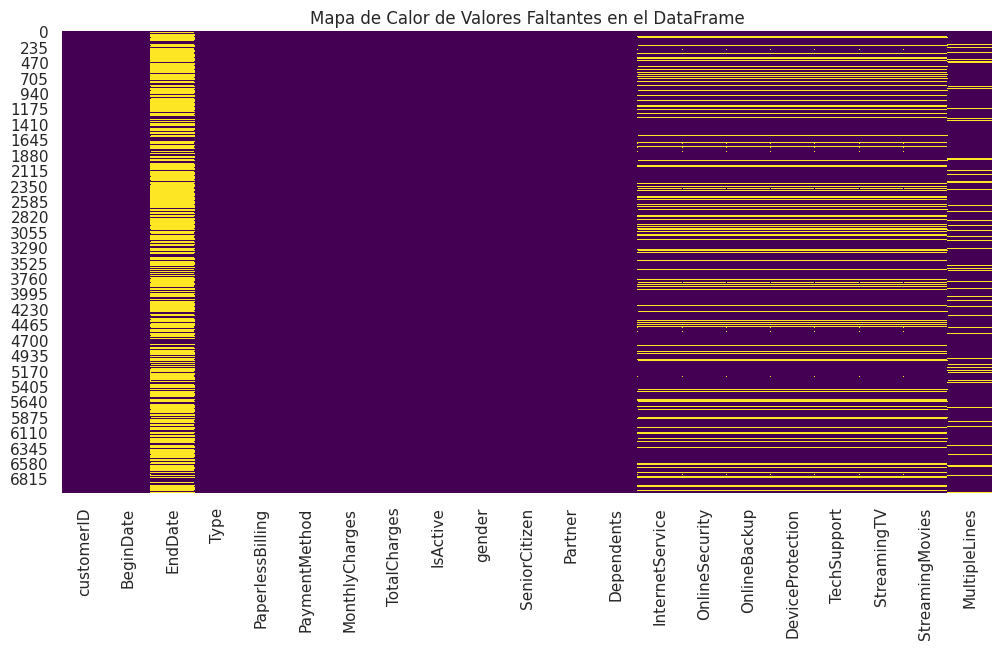

In [12]:
# Revisamos la cantidad de valores faltantes por columna
missing_values = df.isna().sum().sort_values(ascending=False)

# Mostramos los valores faltantes
print(missing_values)

# Además visualizamos los valores faltantes usando un heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title('Mapa de Calor de Valores Faltantes en el DataFrame')
plt.show()

En base a el resultado de la exploración vamos a abordar el tratamiento de los valores faltantes de la siguiente manera:

Variable EndDate:
Hay 5174 valores faltantes en EndDate, lo cual tiene sentido porque corresponde a clientes que no han cancelado su contrato (están activos). No vamos a realizar nada con estos valores faltantes ya que están representados adecuadamente en la columna IsActive.

Variables con Valores Faltantes Yes/No
Para las variables que tienen valores Yes y No, que corresponde a las variables OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies y MultipleLines, vamos a imputar los valores faltantes con No, ya que probablemente el Valor Faltante indica que el cliente no tiene contratado ese servicio.

Variable InternetService
La variable InternetService es un caso especial ya que tiene valores Fiber optic y DSL, pero los valores faltantes no pueden ser interpretados de la misma manera que en las otras columnas. Dado que un valor faltante en esta columna podría indicar que el cliente no tiene servicio de Internet en absoluto, vamos a imputar esos valores con una nueva categoría, como No Internet.

In [14]:
# Primero imputamos valores faltantes con 'No' para las columnas con valores 'Yes/No'
columns_to_impute_no = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

df[columns_to_impute_no] = df[columns_to_impute_no].fillna('No')

# Luego imputamos valores faltantes con 'No Internet' para la columna 'InternetService'
df['InternetService'] = df['InternetService'].fillna('No Internet')

# Finalmente verificamos que ya no hay valores faltantes
missing_values_after = df.isna().sum().sort_values(ascending=False)
print(missing_values_after)

EndDate             5174
customerID             0
Partner                0
StreamingMovies        0
StreamingTV            0
TechSupport            0
DeviceProtection       0
OnlineBackup           0
OnlineSecurity         0
InternetService        0
Dependents             0
SeniorCitizen          0
BeginDate              0
gender                 0
IsActive               0
TotalCharges           0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Type                   0
MultipleLines          0
dtype: int64


In [27]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   IsActive          7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Tu análisis exploratorio es exhaustivo y bien estructurado. Has examinado cuidadosamente cada conjunto de datos, identificando tipos de datos, valores nulos y características importantes.
</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Considera añadir algunas visualizaciones para ilustrar mejor la distribución de las variables clave.
</div>
</div>
<div class="alert alert-block alert-info">
<b>Hola Hesus, ok vamos a incorporar algunas visualizaciones para ilustrar mejor la distribución de las variables clave.</b> <a class=“tocSkip”></a>
</div>


### Visualización de Variables

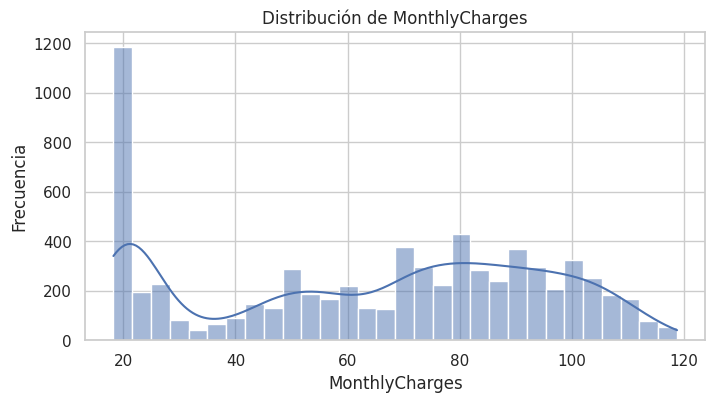

In [31]:
# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

# Histograma de MonthlyCharges
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

Los comentarios que podemos indicar para el gráfico de distribución de los cargos mensuales de los clientes son:

  - Distribución Asimétrica: El histograma muestra que la mayoría de los clientes tienen cargos mensuales bajos, alrededor de los 20 dólares, lo que indica una posible concentración de clientes en planes de bajo costo. Esta distribución es asimétrica hacia la derecha, lo que significa que hay menos clientes con cargos mensuales altos.
  - Variabilidad en los Cargos: Aunque la mayoría de los clientes se encuentran en el rango más bajo de cargos, también se observa una amplia variabilidad en los cargos mensuales, con una dispersión que alcanza hasta los 120 dólares. Esto sugiere que la empresa ofrece una variedad de planes o servicios que resultan en diferentes niveles de facturación mensual.
  - Posible Segmentación de Clientes: La forma del histograma sugiere la existencia de diferentes segmentos de clientes, cada uno con características de consumo diferentes. Esto podría estar relacionado con el tipo de servicio que tienen contratado, como por ejemplo, servicios básicos vs. servicios adicionales como TV o soporte técnico.

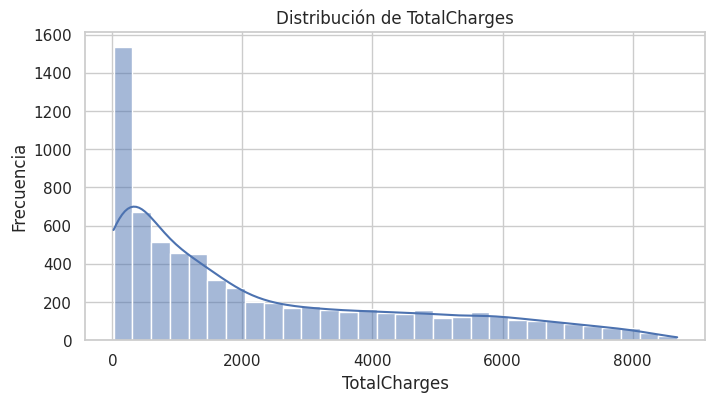

In [32]:
# Histograma de TotalCharges
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Distribución de TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.show()

Los comentarios que podemos indicar para el gráfico de la distribución de los cargos totales acumulados por los clientes son:

  - Distribución Sesgada a la Derecha: La distribución de TotalCharges es altamente asimétrica hacia la derecha, lo que indica que la mayoría de los clientes han acumulado cargos relativamente bajos, mientras que un número menor de clientes ha acumulado cargos significativamente más altos.
  - Amplia Gama de TotalCharges: La variabilidad en TotalCharges es considerable, con algunos clientes acumulando hasta cerca de 9,000 dólares. Esto podría estar asociado con clientes de larga duración o aquellos que han contratado múltiples servicios adicionales.

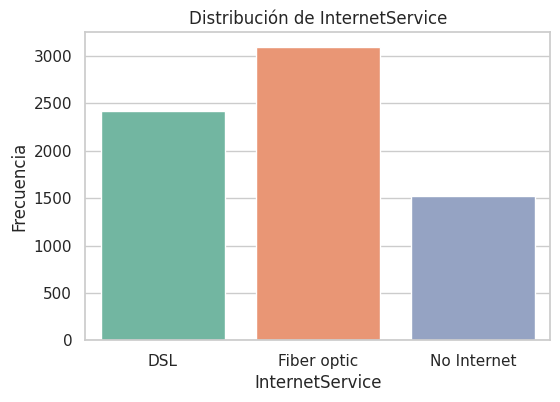

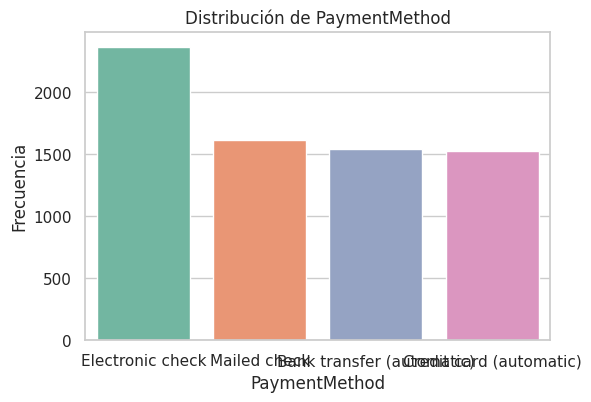

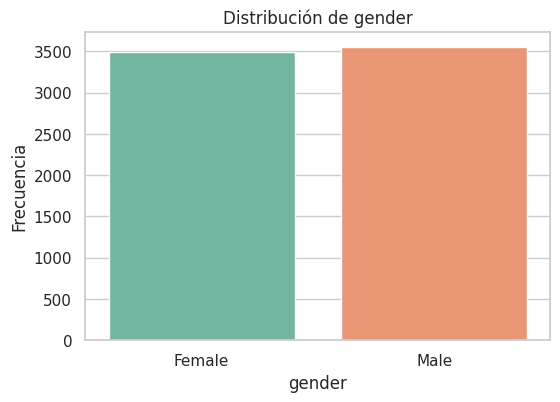

In [41]:
# Gráfico de barras para variables categóricas
categorical_vars = ['InternetService', 'PaymentMethod', 'gender']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[var], palette="Set2")
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

Comentarios gráficos anteriores: 

  - La mayor parte de los clientes utiliza Fiber optic como servicio de internet, lo que sugiere una preferencia por este tipo de conexión, probablemente debido a su mayor velocidad y estabilidad en comparación con el DSL.
  
  - Un segmento significativo de los clientes no tiene servicio de internet contratado. Este grupo podría estar más orientado a servicios que no requieren conexión a internet o podrían representar a clientes que solo utilizan servicios básicos de telefonía.
  
  - El método de pago más utilizado por los clientes es Electronic check. Esto podría deberse a la facilidad de realizar pagos directamente desde una cuenta bancaria sin necesidad de involucrar otros intermediarios.

  -  la distribución entre géneros está prácticamente equilibrada, con una cantidad muy similar de clientes masculinos y femeninos. Esto indica que no hay un sesgo significativo hacia un género específico en la base de clientes de la compañía.
  
  
  
  

## Análisis del Equilibrio de Clases.

El objetivo de este análisis es evaluar si la variable objetivo IsActive está desbalanceada, lo cual podría influir en el rendimiento de los modelos de machine learning.

Para ello primero realizamos un Conteo de Clases para lo cual usamos value_counts() para contar la cantidad de instancias de cada clase en la variable IsActive.
Luego creamos un gráfico de barras para visualizar la distribución de clases, lo que nos permitirá identificar rápidamente si hay un desbalance significativo.

1    5174
0    1869
Name: IsActive, dtype: int64


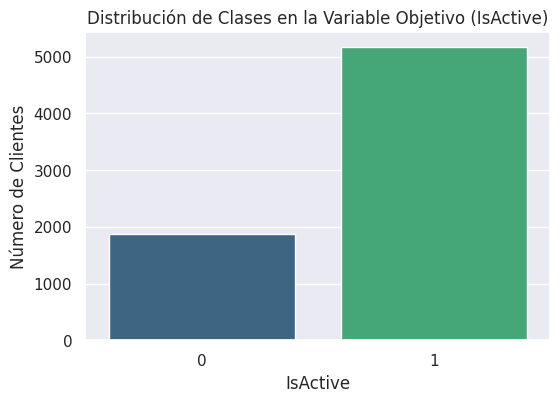

In [15]:
# Contar la cantidad de clases en la variable objetivo
class_counts = df['IsActive'].value_counts()

# Mostrar los resultados
print(class_counts)

# Visualizar la distribución de clases
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Distribución de Clases en la Variable Objetivo (IsActive)')
plt.xlabel('IsActive')
plt.ylabel('Número de Clientes')
plt.show()

Podemos ver que la variable IsActive está desbalanceada: hay significativamente más clientes activos (1) que inactivos (0).

Análisis del Desbalance:

	•	Clientes Activos (1): 5,174
	•	Clientes Inactivos (0): 1,869

Vamos a tener en consideración este desequilibrio de clases al momento de probar los modelos y además probaremos técnicas de sobremuestro de la clase minoritaria. Para ello primero el conjunto de datos ya debe estar dividido en conjuntos de entrenamiento, validación y prueba. Además que las variables categóricas deben haber sido transformadas usando One-Hot Encoding, por lo que vamos a realizar primero esos pasos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Excelente trabajo al identificar y visualizar el desequilibrio de clases. Este es un paso crucial para entender cómo abordar el problema de clasificación.
</div><div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Excelente trabajo al identificar y visualizar el desequilibrio de clases. Este es un paso crucial para entender cómo abordar el problema de clasificación.
</div>

 ## División del Conjunto de Datos.

Vamos a proceder a dividir los datos en conjuntos de entrenamiento, validación y prueba:

 - Entrenamiento: para entrenar el modelo.
 - Validación: para afinar los hiperparámetros y seleccionar el mejor modelo.
 - Prueba: para evaluar el rendimiento final del modelo de manera objetiva.
 
 
Además vamos a definir las características utilizadas para el modelado (X) eliminando aquellas que no aportan valor predictivo directo, tales como identificadores únicos (customerID) y fechas (BeginDate, EndDate). 

La variable objetivo (y) seleccionada fue IsActive, que indica si el cliente está activo.

La división la vamos a realizar utilizando train_test_split con stratify=y, lo cual asegura que la proporción de clases se mantenga consistente en cada conjunto.

In [16]:
# Definimos las características (X) y la variable objetivo (y)
X = df.drop(columns=['IsActive', 'customerID', 'BeginDate', 'EndDate'])
y = df['IsActive']

# Dividimos en conjunto de entrenamiento y conjunto temporal (para validación y prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividimos el conjunto temporal en validación y prueba
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verificamos el tamaño de cada conjunto
print("Forma del Dataframe:", df.shape)
print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")

Forma del Dataframe: (7043, 21)
Train set: (4930, 17), Validation set: (1056, 17), Test set: (1057, 17)


Imprimimos las formas de los DataFrames para asegurarnos de que la división se haya realizado correctamente.

Resultados:

  - df.shape: (7043, 21) — Esto confirma que tu DataFrame original tiene 7043 filas y 21 columnas.
  - Train set:: (4930, 17) — El conjunto de entrenamiento tiene 4930 filas, lo cual es aproximadamente el 70% de los datos totales.
  - Validation set: (1056, 17) — El conjunto de validación tiene 1056 filas, lo cual es aproximadamente el 15% de los datos totales.
  - Test set: (1057, 17) — El conjunto de prueba tiene 1057 filas, lo cual es aproximadamente el 15% de los datos totales.
  
  La revisión de las dimensiones de los conjuntos de datos resultantes mostró la correcta división: 4930 muestras para el entrenamiento, y aproximadamente 1056 muestras para cada uno de los conjuntos de validación y prueba.
  
  A continuación para confirmar y visualizar la división del conjunto de datos, vamos a revisar el conjunto de entrenamiento.

In [17]:
print(X_train.info())
print('----------------')
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 2845 to 3101
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              4930 non-null   object 
 1   PaperlessBilling  4930 non-null   object 
 2   PaymentMethod     4930 non-null   object 
 3   MonthlyCharges    4930 non-null   float64
 4   TotalCharges      4930 non-null   float64
 5   gender            4930 non-null   object 
 6   SeniorCitizen     4930 non-null   int64  
 7   Partner           4930 non-null   object 
 8   Dependents        4930 non-null   object 
 9   InternetService   4930 non-null   object 
 10  OnlineSecurity    4930 non-null   object 
 11  OnlineBackup      4930 non-null   object 
 12  DeviceProtection  4930 non-null   object 
 13  TechSupport       4930 non-null   object 
 14  StreamingTV       4930 non-null   object 
 15  StreamingMovies   4930 non-null   object 
 16  MultipleLines     4930 non-null   objec

Vemos que el conjunto de entrenamiento consta de 4930 registros y 17 características, todas las cuales están completamente pobladas sin valores faltantes. Las características incluyen variables categóricas y numéricas que describen el comportamiento y las preferencias de los clientes en relación con sus servicios y pagos.

Debido a la presencia de múltiples variables categóricas, será crucial realizar una codificación adecuada (como One-Hot Encoding) para transformar estas variables en un formato que los modelos puedan procesar eficientemente. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Has realizado una división adecuada de los datos en conjuntos de entrenamiento, validación y prueba. El uso de stratify es una buena práctica para mantener la proporción de clases.
</div>

## Aplicación One-Hot Encoding.

Para preparar los datos para el modelado, vamos a aplicar la técnica de One-Hot Encoding a las columnas categóricas. Esta técnica convierte las categorías en variables binarias (0 o 1), lo cual es necesario para que los modelos de Machine Learning puedan procesar estas características correctamente. Se utilizará la opción drop_first=True para evitar la multicolinealidad, lo que mejora la estabilidad del modelo.

In [18]:
# Identificamos las columnas categóricas para aplicar One-Hot Encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Aplicamos One-Hot Encoding
if len(categorical_columns) > 0:
    X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
    X_valid = pd.get_dummies(X_valid, columns=categorical_columns, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

    # Alineamos los conjuntos de datos en caso de que haya diferencias de columnas después de One-Hot Encoding
    X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [19]:
# Analizamos el conjunto de datos X_train
print(X_train.info())
print('----------------')
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 2845 to 3101
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         4930 non-null   float64
 1   TotalCharges                           4930 non-null   float64
 2   SeniorCitizen                          4930 non-null   int64  
 3   Type_One year                          4930 non-null   uint8  
 4   Type_Two year                          4930 non-null   uint8  
 5   PaperlessBilling_Yes                   4930 non-null   uint8  
 6   PaymentMethod_Credit card (automatic)  4930 non-null   uint8  
 7   PaymentMethod_Electronic check         4930 non-null   uint8  
 8   PaymentMethod_Mailed check             4930 non-null   uint8  
 9   gender_Male                            4930 non-null   uint8  
 10  Partner_Yes                            4930 non-null   uint8  
 11  D

Vemos que el One-Hot Encoding se aplicó de manera exitosa, transformando todas las columnas categóricas en variables binarias sin pérdida de información ni creación de valores nulos.
El DataFrame X_train resultante contiene 21 columnas, con todas las variables categóricas codificadas en formato binario. 

A continuación vamos a realizar una matriz de correlación y la vamos a graficar ocupando un mapa de calor (Heatmap). El objetivo de este análisis es solo para verificar si existen algunas variables que tuvieran una alta corrrelación, de manera de poder eliminar variables antes de ejecutar los modelos.

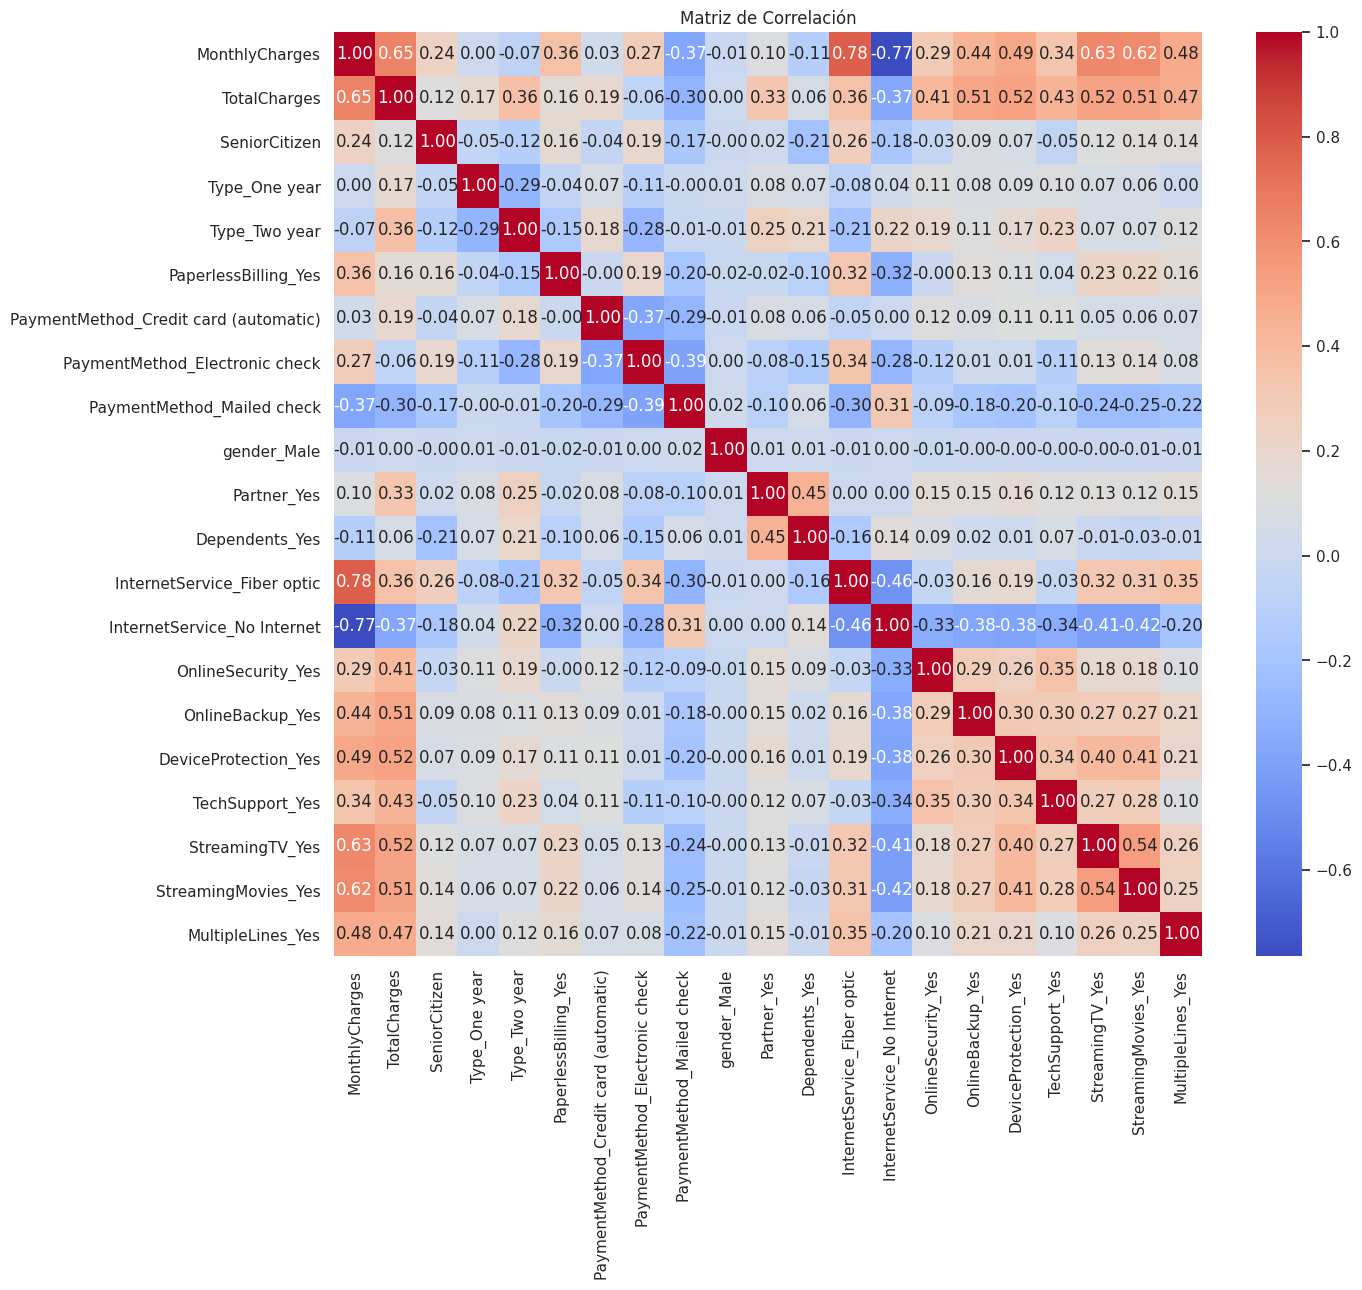

In [20]:
# Calcular la matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

No se observan correlaciones extremadamente altas (cercanas a 1 o -1) entre pares de variables, lo que sugiere que no hay redundancia significativa en las características.

Dado que no se identifican correlaciones altas que puedan causar multicolinealidad, no parece necesario eliminar ninguna de las variables antes de proceder con la construcción de los modelos. 

Asi que con la matriz de correlación revisada, vamos a proceder a la construcción de los modelos con la confirmación de que no tenemos variables redundantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Buen trabajo en la aplicación de One-Hot Encoding. Has manejado correctamente las variables categóricas.
</div>

## Selección y Entrenamiento del Modelos.

Primero vamos a comenzar con un modelo simple Regresión Logística, considerando el uso de class_weight='balanced', esto permite ajustar los pesos de las clases inversamente proporcional a sus frecuencias, ayudando a manejar el desequilibrio en las clases. 

Este parámetro class_weight='balanced' lo vamos a ocupar en todos los modelos.

In [21]:
# Entrenamos modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predecimos en el conjunto de validación
y_valid_pred = model.predict(X_valid)

# Evaluamos rendimiento
print("Evaluación del modelo Regresión Lineal:")
print("AUC-ROC:", roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]))
print("Exactitud:", accuracy_score(y_valid, y_valid_pred))

Evaluación del modelo Regresión Lineal:
AUC-ROC: 0.8357948269513992
Exactitud: 0.7537878787878788


A continuación seguimos con el análisis con un modelo de Bosque Aleatorio inicial.

In [22]:
# Entrenamos el modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predecimos en el conjunto de validación
y_valid_rf_pred = rf_model.predict(X_valid)

# Evaluamos rendimiento
print("Evaluación del modelo Bosque Aleatorio:")
print("AUC-ROC:", roc_auc_score(y_valid, rf_model.predict_proba(X_valid)[:, 1]))
print("Exactitud:", accuracy_score(y_valid, y_valid_rf_pred))

Evaluación del modelo Bosque Aleatorio:
AUC-ROC: 0.8440583578792342
Exactitud: 0.7708333333333334


Resultados Obtenidos:

AUC-ROC:
	•	Un AUC-ROC de 0.8441 indica una buena capacidad del modelo de Bosque Aleatorio para distinguir entre las clases, mostrando una mejora en comparación con el modelo de regresión logística.

Exactitud:
	•	La exactitud de 0.7708 es ligeramente superior a la obtenida con la regresión logística (0.7538), lo que sugiere que el modelo de Bosque Aleatorio está haciendo un mejor trabajo en la clasificación correcta de los ejemplos en el conjunto de validación.

Finalmente vamos a probar un modelo inicial de LightGBM.

In [23]:
# Entrenamos el modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
lgb_model.fit(X_train, y_train)

# Predecimos en el conjunto de validación
y_valid_lgb_pred = lgb_model.predict(X_valid)

# Evaluamos rendimiento
print("\nEvaluación del modelo LightGBM:")
print("AUC-ROC:", roc_auc_score(y_valid, lgb_model.predict_proba(X_valid)[:, 1]))
print("Exactitud:", accuracy_score(y_valid, y_valid_lgb_pred))


Evaluación del modelo LightGBM:
AUC-ROC: 0.8445922312223859
Exactitud: 0.7585227272727273


Resultados Obtenidos:

AUC-ROC:
	•	El modelo de LightGBM obtuvo un AUC-ROC de 0.8446, que es muy similar al del Bosque Aleatorio (0.8441). Esto sugiere que ambos modelos están ofreciendo un rendimiento comparable en términos de su capacidad para distinguir entre clases.
    
Exactitud:
	•	La exactitud obtenida fue de 0.7585, ligeramente inferior a la del Bosque Aleatorio (0.7708) y comparable a la de la regresión logística (0.7538). Aunque la exactitud es importante, el enfoque principal en un problema con clases desbalanceadas debería ser en la métrica AUC-ROC.

Conclusiones Análisis de los 3 modelos:

El LightGBM, al igual que el Bosque Aleatorio, supera claramente a la regresión logística en términos de AUC-ROC, lo que refuerza la idea de que un modelo más complejo es más adecuado para este conjunto de datos.

La exactitud del LightGBM es también superior a la de la regresión logística, aunque la diferencia no es muy significativa.

LightGBM y Bosque Aleatorio tienen un rendimiento similar en términos de AUC-ROC, lo cual es un hallazgo positivo. Sin embargo, el Bosque Aleatorio tiene una ligera ventaja en la exactitud.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Has probado varios modelos y comparado sus rendimientos de manera efectiva. El uso de class_weight='balanced' es una buena decisión para manejar el desequilibrio de clases.
</div>

## Búsqueda Hiperparámetros con GridSearchCV.

De los tres modelos analizados, vamos a continuar nuestro análisis eligiendo al modelo de Bosque Aleatorio, quien obtiene un buen valor en el AUC-ROC y el mejor valor en exactitud.
Para este modelo buscaremos los hiperparámetros que nos entrguen el mejor AUC-ROC utilizando un GridSearchCV.

Para eso definimos la cuadrícula de hiperparámetros que utilizaremos, configurando el GridSearchCV para optimizar en función de la métrica AUC-ROC, y mostrando los mejores hiperparámetros junto con el mejor puntaje obtenido.

In [24]:
%%time
# Definimos el modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Definimos la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en una hoja
    'bootstrap': [True, False]  # Método para seleccionar muestras para entrenar cada árbol
}

# Configuramos el GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Entrenamos el modelo utilizando GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")

# Mostramos el mejor puntaje de AUC-ROC
print(f"Mejor AUC-ROC obtenido: {grid_search_rf.best_score_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, mi

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=None,

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_sampl

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_le

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=None

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None

Los mejores hiperparámetros encontrados  son: bootstrap: True, max_depth: 10, min_samples_leaf: 4, min_samples_split: 2, n_estimators: 200).

El mejor AUC-ROC obtenido de 0.8450015567462155 es competitivo y refleja un buen rendimiento en el conjunto de validación.

Ahora utilizamos los mejores hiperparámetros obtenidos del proceso de Grid Search para configurar el modelo de Bosque Aleatorio. Con esto aseguramos que estás utilizando una versión optimizada del modelo para la evaluación en el conjunto de prueba.

In [25]:
%%time
# Definimos el modelo con los mejores hiperparámetros encontrados
best_rf_model = RandomForestClassifier(
    bootstrap=True, 
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced'
)

# Entrenamos el modelo con el conjunto de entrenamiento completo
best_rf_model.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
y_test_rf_pred = best_rf_model.predict(X_test)
print("\nEvaluación del modelo de Bosque Aleatorio en el conjunto de prueba:")
print("AUC-ROC:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))
print("Exactitud:", accuracy_score(y_test, y_test_rf_pred))


Evaluación del modelo de Bosque Aleatorio en el conjunto de prueba:
AUC-ROC: 0.8377389294493158
Exactitud: 0.7776726584673604
CPU times: user 611 ms, sys: 10 µs, total: 611 ms
Wall time: 610 ms


Resultados obtenidos:

  - AUC-ROC: El valor obtenido de 0.8377 es bastante alto y refleja que el modelo tiene un buen rendimiento en la distinción entre las clases en el conjunto de prueba. Es un indicativo de que el modelo está generalizando bien a datos no vistos.
    
  - Exactitud: La exactitud de 0.7777 muestra que aproximadamente el 77.8% de las predicciones realizadas por el modelo en el conjunto de prueba son correctas. Este valor es consistente con el AUC-ROC y sugiere un rendimiento razonable en términos de clasificación general.

Ahora con el fin de intentar continuar optimizando los resultados vamos a ocupar una técnica del sobremuestreo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Excelente uso de GridSearchCV para optimizar los hiperparámetros del modelo de Bosque Aleatorio. Has demostrado una buena comprensión de la importancia de la optimización de hiperparámetros.
</div>

## Método del Sobremuestreo. 

A continuación vamos a ocupar la técnica del Sobre Muestreo para abordar el desequilibrio de clases. Esta técnica busca equilibrar la distribución de clases aumentando el número de muestras de la clase minoritaria mediante la replicación de las muestras existentes.

Vamos a replicar las muestras de la clase minoritaria ("repeat") calculando el valor de F1_score para los valores de repeat igual a 1, 5, 10, 15, 20, 25 y 30.  

In [26]:
%%time

# Primero definimos la función para el sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Sobremuestreo de la clase minoritaria
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Mezclamos de manera aleatoria los datos
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42
    )

    return features_upsampled, target_upsampled

# Definimos los valores de repeat para iterar
repeat_values = [1, 5, 10, 15, 20, 25, 30]

best_auc_roc = 0
best_repeat_value = None

# Iteraramos sobre los valores de repeat
for repeat in repeat_values:
    features_upsampled, target_upsampled = upsample(X_train, y_train, repeat)
    
    # Entrenamos el modelo de Bosque Aleatorio inicial
    rf_initial_model = RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        random_state=42, 
        class_weight='balanced'
    )
    rf_initial_model.fit(features_upsampled, target_upsampled)

    # Evaluamos en el conjunto de validación
    y_valid_rf_pred_proba = rf_initial_model.predict_proba(X_valid)[:, 1]

    # Calculamos el AUC-ROC en el conjunto de validación
    auc_roc = roc_auc_score(y_valid, y_valid_rf_pred_proba)
    print(f"AUC-ROC en el conjunto de validación (Repeat={repeat}):", auc_roc)

    # Actualizamos el mejor AUC-ROC y el valor de repeat
    if auc_roc > best_auc_roc:
        best_auc_roc = auc_roc
        best_repeat_value = repeat

# Mostramos el mejor AUC-ROC y el valor de repeat asociado
print(f"Mejor AUC-ROC en el conjunto de validación: {best_auc_roc} (Repeat={best_repeat_value})")

# Aplicar sobremuestreo en el conjunto de entrenamiento completo con el mejor repeat
features_upsampled, target_upsampled = upsample(X_train, y_train, repeat=best_repeat_value)

# Definimos los mejores hiperparámetros encontrados
best_params_rf = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'bootstrap': True,
    'random_state': 42,
    'class_weight': 'balanced'
}

# Entrenamos el modelo con los mejores hiperparámetros en el conjunto de entrenamiento completo
rf_final_model = RandomForestClassifier(**best_params_rf)
rf_final_model.fit(features_upsampled, target_upsampled)

# Hacemos predicciones en el conjunto de prueba
y_test_rf_pred_proba = rf_final_model.predict_proba(X_test)[:, 1]

# Calculamos el AUC-ROC y la exactitud en el conjunto de prueba
auc_roc_test_rf = roc_auc_score(y_test, y_test_rf_pred_proba)
accuracy_test_rf = accuracy_score(y_test, rf_final_model.predict(X_test))

print("AUC-ROC en el conjunto de prueba (Bosque Aleatorio Final):", auc_roc_test_rf)
print("Exactitud en el conjunto de prueba (Bosque Aleatorio Final):", accuracy_test_rf)

AUC-ROC en el conjunto de validación (Repeat=1): 0.8440721649484537
AUC-ROC en el conjunto de validación (Repeat=5): 0.8461133100147277
AUC-ROC en el conjunto de validación (Repeat=10): 0.8447625184094256
AUC-ROC en el conjunto de validación (Repeat=15): 0.8442723674521355
AUC-ROC en el conjunto de validación (Repeat=20): 0.8450294550810016
AUC-ROC en el conjunto de validación (Repeat=25): 0.8440353460972019
AUC-ROC en el conjunto de validación (Repeat=30): 0.8459430228276879
Mejor AUC-ROC en el conjunto de validación: 0.8461133100147277 (Repeat=5)
AUC-ROC en el conjunto de prueba (Bosque Aleatorio Final): 0.8366795685511978
Exactitud en el conjunto de prueba (Bosque Aleatorio Final): 0.7899716177861873
CPU times: user 15.6 s, sys: 15.9 ms, total: 15.6 s
Wall time: 15.6 s


Los resultados obtenidos muestran un comportamiento interesante en el modelo de Bosque Aleatorio después de aplicar el sobremuestreo con diferentes valores de repeat. 

Rendimiento del Modelo en Validación:

 - El mejor AUC-ROC en el conjunto de validación se obtuvo con un repeat de 5, alcanzando un valor de 0.8461. Este valor es ligeramente superior al obtenido en las otras iteraciones, lo que indica que un sobremuestreo moderado (repitiendo las muestras de la clase minoritaria 5 veces) puede ser beneficioso para el modelo en términos de discriminación entre las clases.
    
  - Es notable que el AUC-ROC no mejora significativamente con valores de repeat más altos, lo que sugiere que agregar demasiadas copias de la clase minoritaria podría no proporcionar beneficios adicionales y, en algunos casos, incluso disminuir el rendimiento.
    
Rendimiento del Modelo en el Conjunto de Prueba:

  - El AUC-ROC obtenido en el conjunto de prueba después de aplicar el sobremuestreo y entrenar con los mejores hiperparámetros es 0.8367, lo cual es bastante consistente con los resultados de validación. Este valor es competitivo, pero no supera significativamente los resultados obtenidos anteriormente sin sobremuestreo.
    
  - La exactitud en el conjunto de prueba es 0.7899, que también es comparable a los valores previos, lo que indica que el modelo mantiene una capacidad de clasificación aceptable, aunque el enfoque principal aquí es la mejora del AUC-ROC.
    

El sobremuestreo con un repeat de 5 parece ser la mejor opción en términos de equilibrio entre las clases, ya que mejora ligeramente el AUC-ROC en la validación y no causa un deterioro significativo en el conjunto de prueba.

Sin embargo, la mejora obtenida en el AUC-ROC en comparación con los modelos sin sobremuestreo es marginal. Esto sugiere que, en este caso particular, el sobremuestreo no proporciona una ventaja significativa en términos de rendimiento predictivo, pero tampoco lo empeora considerablemente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Tu enfoque para abordar el desequilibrio de clases mediante sobremuestreo es interesante y bien ejecutado. Has mostrado cómo diferentes niveles de sobremuestreo afectan el rendimiento del modelo.
</div>

## Conclusiones.


1. Resumen del Proceso:

  - A lo largo de este proyecto, hemos desarrollado un enfoque integral para modelar y predecir la actividad de los clientes utilizando diversas técnicas de Machine Learning. Comenzamos con un análisis exploratorio de datos (EDA) para comprender la naturaleza y distribución de las variables, seguido de una preparación de los datos, que incluyó la codificación de variables categóricas mediante One-Hot Encoding y la verificación de la correlación entre características.
    

2. Modelos Evaluados:

  - Probamos varios modelos, incluyendo Regresión Logística, Bosque Aleatorio y LightGBM, para evaluar su capacidad predictiva sobre el conjunto de datos. El rendimiento de los modelos fue evaluado utilizando métricas clave como el AUC-ROC y la exactitud en el conjunto de validación.
    
  - El Bosque Aleatorio y LightGBM demostraron ser los modelos más prometedores, con un rendimiento superior al de la Regresión Logística.
  

3. Optimización y Sobremuestreo:

  - Aplicamos técnicas de optimización de hiperparámetros como GridSearchCV para afinar el modelo y maximizar su rendimiento.
  - Consideramos la técnica de sobremuestreo para abordar el desequilibrio de clases. 
  - Aunque el sobremuestreo con un repeat óptimo mejoró ligeramente el rendimiento en validación, los resultados en el conjunto de prueba fueron consistentes, lo que sugiere que el modelo es robusto, pero que el sobremuestreo no proporcionó una mejora significativa.
  

4. Desempeño Final:

  - El mejor rendimiento se obtuvo con el modelo de Bosque Aleatorio optimizado y con sobremuestreo, alcanzando un AUC-ROC de 0.84 y una exactitud de 0.79 en el conjunto de prueba. Estos resultados reflejan un equilibrio razonable entre la capacidad de discriminación del modelo y su exactitud global.



Este proyecto ha permitido aplicar una variedad de técnicas avanzadas de Machine Learning en un problema realista, fortaleciendo la comprensión y habilidad para abordar desafíos complejos en el análisis de datos. Los aprendizajes obtenidos proporcionan una excelente base para futuros proyectos de análisis predictivo.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
<br>
Tus conclusiones son detalladas y reflexivas. Has resumido efectivamente el proceso, los hallazgos clave y las implicaciones de tu análisis.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Impresionante esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
Tu habilidad para ejecutar y presentar este trabajo es admirable.<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>


## Feedback informe de solucion. 

<div class="alert alert-block alert-success">
<b>Comentario final:</b><br>
¡Felicitaciones por completar este impresionante proyecto de análisis predictivo! Tu enfoque metódico, desde el análisis exploratorio de datos hasta la implementación de técnicas avanzadas de Machine Learning, demuestra tu dedicación y habilidad técnica.
Para seguir potenciando tu trayectoria, considera estos aspectos clave:
<ul>
  <li><strong>Experimentación con Técnicas de Balanceo</strong>: Tu uso del sobremuestreo fue interesante. Considera explorar otras técnicas como SMOTE o undersampling para comparar resultados.</li>
  <li><strong>Optimización de Modelos</strong>: Tu uso de GridSearchCV para la optimización de hiperparámetros fue excelente. Podrías explorar técnicas más avanzadas como Optimización Bayesiana para afinar aún más tus modelos.</li>
  <li><strong>Interpretabilidad del Modelo</strong>: Dado que utilizaste modelos como Bosque Aleatorio y LightGBM, podrías investigar técnicas para interpretar la importancia de las características, como SHAP values.</li>
  <li><strong>Validación Cruzada Estratificada</strong>: Considera implementar esta técnica para asegurar que el rendimiento de tu modelo sea consistente a través de diferentes subconjuntos de datos.</li>
</ul>
Tu habilidad para analizar críticamente los resultados, especialmente en cuanto al impacto del sobremuestreo, demuestra un pensamiento maduro en ciencia de datos. Estoy emocionado de ver cómo aplicarás estas habilidades en futuros proyectos. ¡Sigue adelante, tu futuro en el análisis de datos es brillante! 🌟📊
</div>
